In [1]:
import ROOT
import ostap.fixes.fixes
from ostap.core.core import cpp, Ostap
from ostap.core.core import pwd, cwd, ROOTCWD
from ostap.core.core import rootID, funcID, funID, fID, histoID, hID, dsID
from ostap.core.core import VE
from ostap.histos.histos import h1_axis, h2_axes, h3_axes
from ostap.histos.graphs import makeGraph, hToGraph, hToGraph2, hToGraph3, lw_graph
import ostap.trees.trees
import ostap.trees.cuts
import ostap.histos.param
import ostap.histos.compare
import ostap.io.root_file
import ostap.math.models
import ostap.fitting.roofit 
import ostap.fitting.models as Models

Welcome to JupyROOT 6.20/06


In [25]:
canv = ROOT.TCanvas("canv","canv",900,450)
#rfile = ROOT.TFile("rad/far/new.root","READ")
#rfile = ROOT.TFile("rad/med/new.root","READ")
rfile = ROOT.TFile("rad/clo/new.root","READ")
ds = rfile["tree"]

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canv


In [26]:
from math import sqrt
my_events  = []
my_events2 = []
for ev in ds:
    lCSC  = sqrt( ev.xCSC**2 + ev.yCSC**2 )
    zTPC  = ev.zpos+2.19+ROOT.gRandom.Gaus(0,0.2576)
    Treco = ev.Tp+ROOT.gRandom.Gaus(0,0.05)
    evt = {"T":Treco, "l":lCSC, "Z":zTPC, "Atr":ev.THETAe, "Ttr":ev.Tp, "Ztr":ev.zpos}
    my_events.append( evt )
print("EVENTS SELECTED (rad.tail): " + str(len(my_events)))

EVENTS SELECTED (rad.tail): 250000


h2: mean=( 135.193 +- 0.00205097 )	 rms=( 0.379567 +- 4.40333 )	( 1.51707e-05 +- 2.3015e-10 )
list mean  137.81799665710273 +- 0.09181864616986561
list sigma 17.747620394054824
list mean    137.81799665710273
list meadian 135.14600694179535
list mode    135.19999384880066


Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).


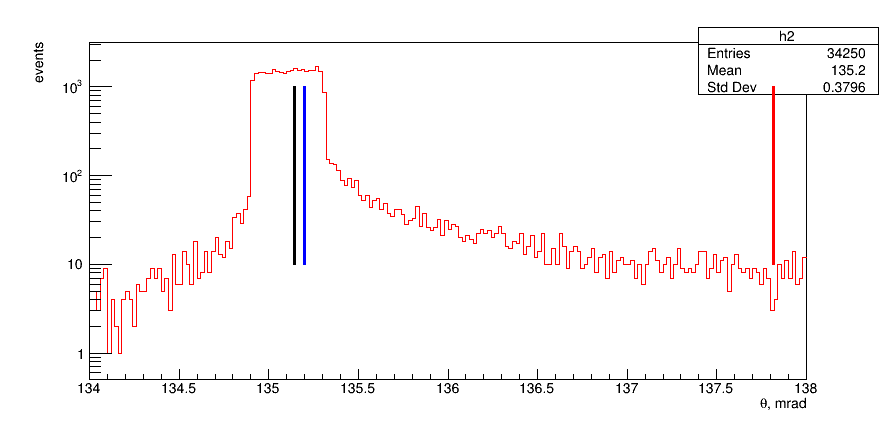

In [27]:
from statistics import mean, median, stdev, mode
h2 = ROOT.TH1F("h2",";#theta, mrad;events",10000,50,250)
h2.SetLineColor(2)
evts = 0.
thetas = []
theta2 = []
for ev in my_events:
    if ev["Ttr"]>4.985 and ev["Ttr"]<5.015:
        h2.Fill(1000.*ev["Atr"])
        thetas.append( 1000.*ev["Atr"] )
        evts+=1.
h2.GetXaxis().SetRangeUser(134,138)
h2.Draw()
Line =ROOT.TLine( mean(thetas), 10, mean(thetas),1000)
Line.SetLineWidth(3)
Line.SetLineColor(2)
Line2 =ROOT.TLine( median(thetas), 10, median(thetas),1000)
Line2.SetLineWidth(3)
Line3 =ROOT.TLine( mode(thetas), 10, mode(thetas),1000)
Line3.SetLineWidth(3)
Line3.SetLineColor(4)
Line.Draw("same")
Line2.Draw("same")
Line3.Draw("same")
ROOT.gPad.SetLogy()
canv.Draw()
print("h2: mean=" + str(h2.mean()) + "\t rms=" + str(h2.rms()) + "\t" + str(h2.mean().prec()))
print("list mean  " + str(mean(thetas)) + " +- " + str(stdev(thetas)/sqrt(evts)))
print("list sigma " + str(stdev(thetas)) )
print("list mean    " + str(mean(thetas)) )
print("list meadian " + str(median(thetas)) )
print("list mode    " + str(mode(thetas)) )

63.57595433324121
0.00973882951786536


Warning in <TROOT::Append>: Replacing existing TH1: hMedian (Potential memory leak).


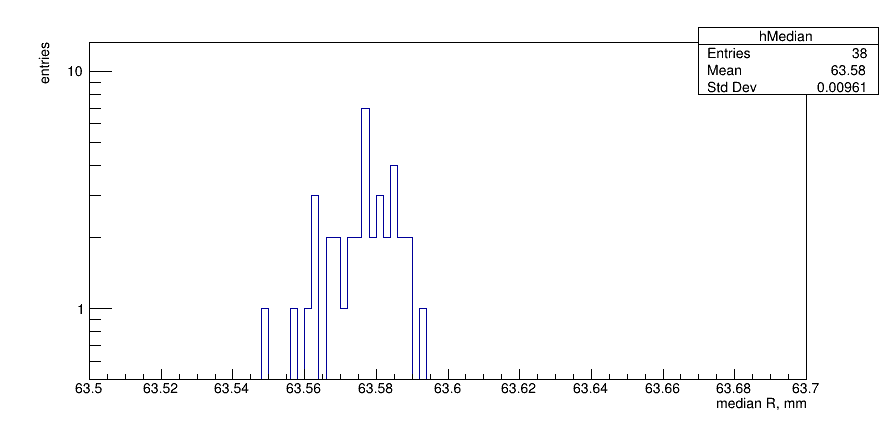

In [30]:
#hMedian = ROOT.TH1F("hMedian",";median R, mm;entries",100,113.70,113.90)
#hMedian = ROOT.TH1F("hMedian",";median R, mm;entries",100,89.,90.)
hMedian = ROOT.TH1F("hMedian",";median R, mm;entries",100,63.5,63.7)
EVENTS = 6578
Nev = 0
Rs = []
MedianR = []
for ev in my_events:
    Rs.append(ev["l"])
    Nev+=1
    if Nev == EVENTS:
        MedianR.append( median(Rs) )
        hMedian.Fill(median(Rs))
        Rs = []
        Nev=0
print(mean(MedianR))
print(stdev(MedianR))
hMedian.Draw()
canv.Draw()


****************************************
Minimizer is Linear / Migrad
Chi2                      =     0.214703
NDf                       =            1
p0                        =      3.52346   +/-   1.18736     
p1                        =    0.0134859   +/-   0.00177084  


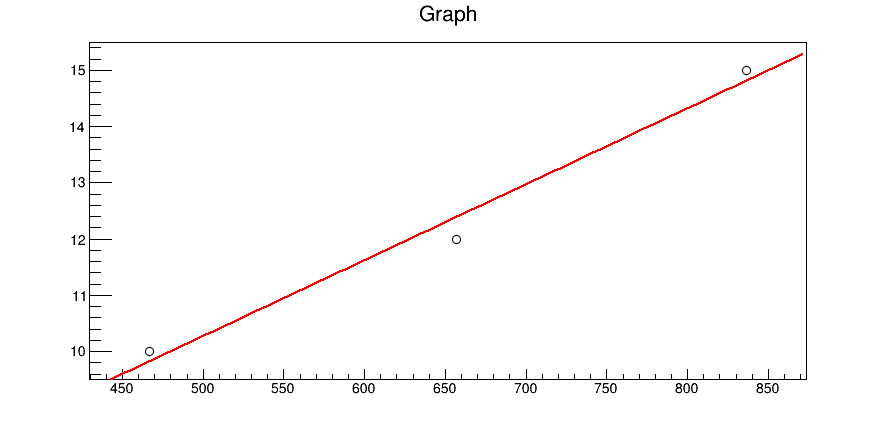

In [38]:
gr = makeGraph([851.6-15., 851.6-195., 851.6-385.],[15,12,10])
gr.SetMarkerStyle(24)
gr.Draw("AP")
gr.Fit("pol1")
ROOT.gPad.SetLogy(False)
canv.Draw()